Epoch 0/100: Loss 1.3315505981445312
Epoch 10/100: Loss 1.302270770072937
Epoch 20/100: Loss 1.2732419967651367
Epoch 30/100: Loss 1.2445168495178223
Epoch 40/100: Loss 1.2161451578140259
Epoch 50/100: Loss 1.188172459602356
Epoch 60/100: Loss 1.160642385482788
Epoch 70/100: Loss 1.1335983276367188
Epoch 80/100: Loss 1.107084035873413
Epoch 90/100: Loss 1.0811444520950317
4/4 [==============================] - 0s 3ms/step


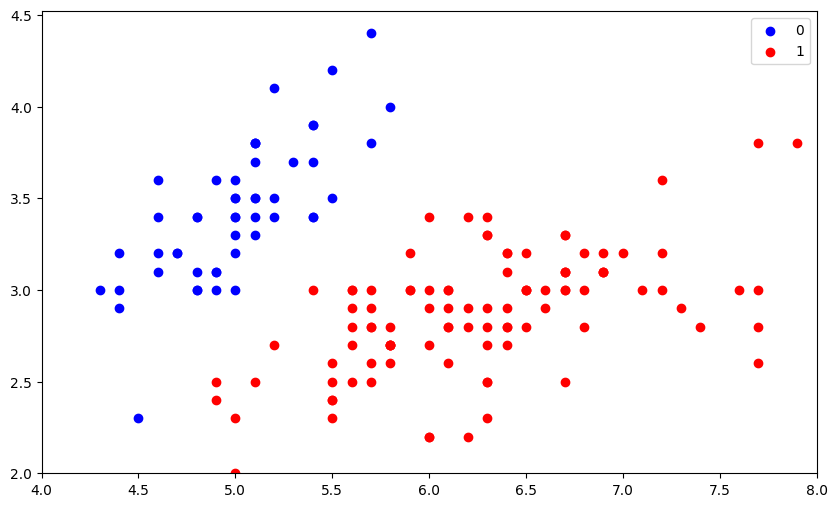

In [2]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 로딩
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
Y = (iris.target != 0) * 1  # making it a binary classification
Y = Y.reshape(-1,1)  # adjust the dimension of Y

# 로지스틱 회귀 모델 정의
class LogisticRegression(tf.keras.Model):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs, training=None, mask=None):
        output = self.dense(inputs)
        return output

# 모델, 옵티마이저, 손실함수 정의
model = LogisticRegression()
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 에폭 수 설정
epochs = 100

# 학습 시작
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(Y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 10 == 0:
        print('Epoch {}/{}: Loss {}'.format(epoch, epochs, loss.numpy()))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X[Y.ravel() == 0][:, 0], X[Y.ravel() == 0][:, 1], color='b', label='0')
plt.scatter(X[Y.ravel() == 1][:, 0], X[Y.ravel() == 1][:, 1], color='r', label='1')
plt.legend()

x = np.linspace(4, 8, 10)
y = np.linspace(2, 4, 10)
X_, Y_ = np.meshgrid(x, y)
Z = model.predict(np.c_[X_.ravel(), Y_.ravel()])
Z = Z.reshape(X_.shape)
plt.contour(X_, Y_, Z, colors='k', levels=[0.5])
plt.show()
